# PyTorch Workflow

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.arange(1,10).shape

torch.Size([9])

## 1. Data (preparing and loading)

I want to stress that "data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.

![machine learning is a game of two parts: 1. turn your data into a representative set of numbers and 2. build or pick a model to learn the representation as best as possible](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)

Machine learning is a game of two parts:
1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the representation as best as possible.

Sometimes one and two can be done at the same time.

But what if you don't have data?

Well, that's where we're at now.

No data.

But we can create some.

Let's create our data as a straight line.

We'll use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

Don't worry if the terms above don't mean much now, we'll see them in action and I'll put extra resources below where you can learn more.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
for x,y in zip(X_train, y_train):
  print(f"(X,y): ({x}, {y})")

(X,y): (tensor([0.]), tensor([0.3000]))
(X,y): (tensor([0.0200]), tensor([0.3140]))
(X,y): (tensor([0.0400]), tensor([0.3280]))
(X,y): (tensor([0.0600]), tensor([0.3420]))
(X,y): (tensor([0.0800]), tensor([0.3560]))
(X,y): (tensor([0.1000]), tensor([0.3700]))
(X,y): (tensor([0.1200]), tensor([0.3840]))
(X,y): (tensor([0.1400]), tensor([0.3980]))
(X,y): (tensor([0.1600]), tensor([0.4120]))
(X,y): (tensor([0.1800]), tensor([0.4260]))
(X,y): (tensor([0.2000]), tensor([0.4400]))
(X,y): (tensor([0.2200]), tensor([0.4540]))
(X,y): (tensor([0.2400]), tensor([0.4680]))
(X,y): (tensor([0.2600]), tensor([0.4820]))
(X,y): (tensor([0.2800]), tensor([0.4960]))
(X,y): (tensor([0.3000]), tensor([0.5100]))
(X,y): (tensor([0.3200]), tensor([0.5240]))
(X,y): (tensor([0.3400]), tensor([0.5380]))
(X,y): (tensor([0.3600]), tensor([0.5520]))
(X,y): (tensor([0.3800]), tensor([0.5660]))
(X,y): (tensor([0.4000]), tensor([0.5800]))
(X,y): (tensor([0.4200]), tensor([0.5940]))
(X,y): (tensor([0.4400]), tensor([0.

### Visualize the data

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

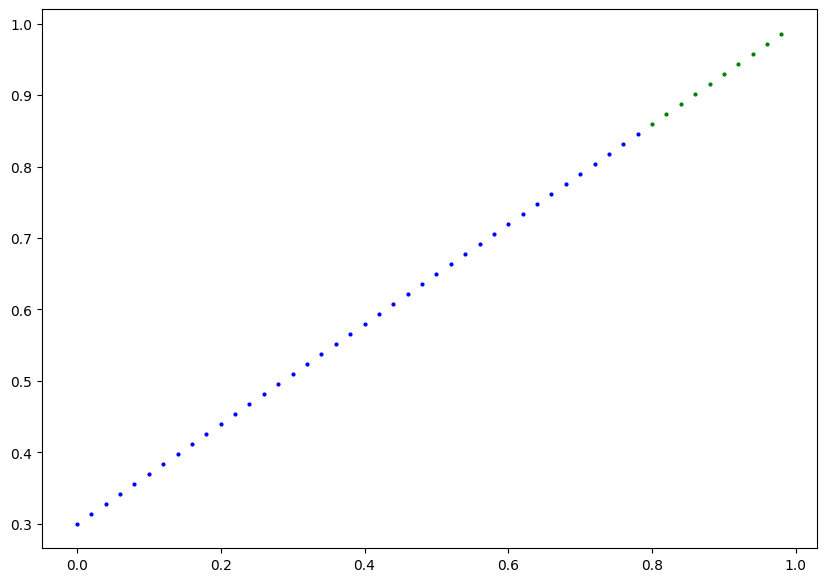

In [8]:
plot_predictions()

## 2. Build Model

Our first PyTorch model!

In [9]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x <- is the input data
    return self.weights * x + self.bias

### Checking the contents of our PyTorch model

In [10]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

In [12]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

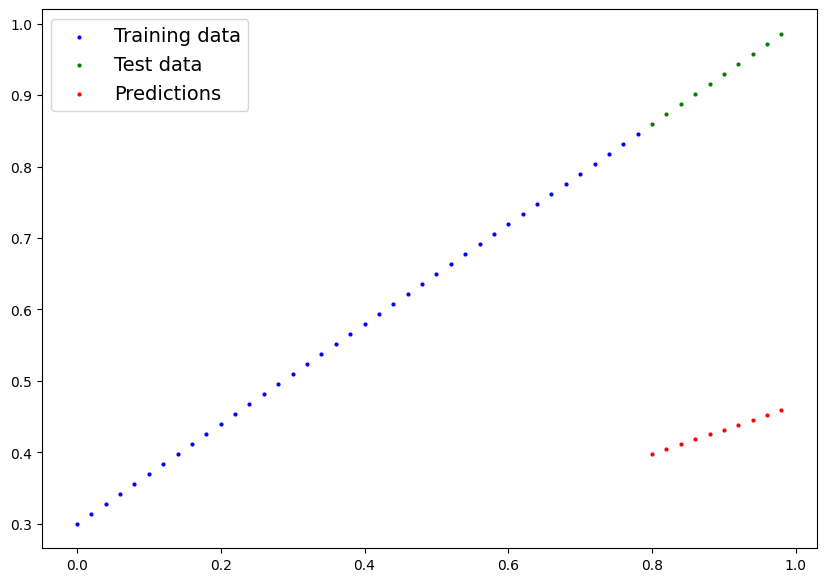

In [13]:
plot_predictions(predictions=y_preds)

## 3. Train model

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to *parameters* as patterns), the `weights` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

We could hard code this (since we know the default values `weight=0.7` and `bias=0.3`) but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.



In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


### 4. Building a training loop (and a testing loop) in PyTorch

In [17]:
torch.manual_seed(42)

# An epoch is one loop through the data...
epochs = 401
divisor = 10 # we reduce the learning rate by this factor

# Track different valyes
epoch_count = []
loss_values = []
test_loss_values = []

### Training
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backprop
  loss.backward()

  #5. Perform gradient descent
  optimizer.step()

  ###Testing
  model_0.eval() # This turns off different settings not needed for evaluation/testing

  with torch.inference_mode(): # turns off gradient tracking
    # 1. Do the forward pass in testing mode
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(f"{model_0.state_dict()}\n")

  if epoch % 160 == 0 and epoch != 0:
    optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01/divisor)
    divisor *= 10

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

Epoch: 200 | Loss: 0.00216333637945354 | Test loss: 0.004960733465850353
OrderedDict([('weights', tensor([0.6894])), ('bias', tensor([0.3045]))])

Epoch: 300 | Loss: 0.00045261980267241597 | Test loss: 0.001096874475479126
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.2996]))])

Epoch: 400 | Loss: 6.094500349718146e-05 | Test loss: 3.690123412525281e-05
OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3001]))])



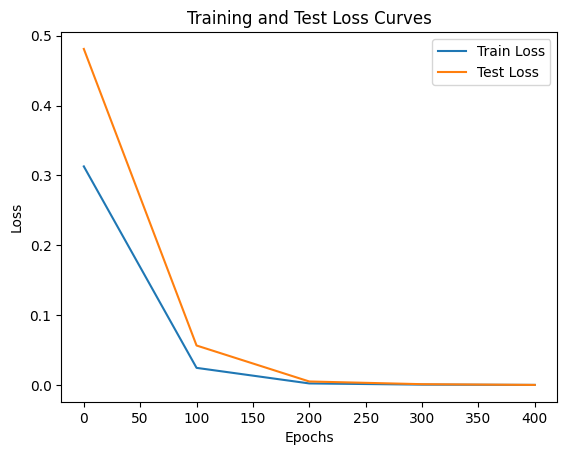

In [18]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [19]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

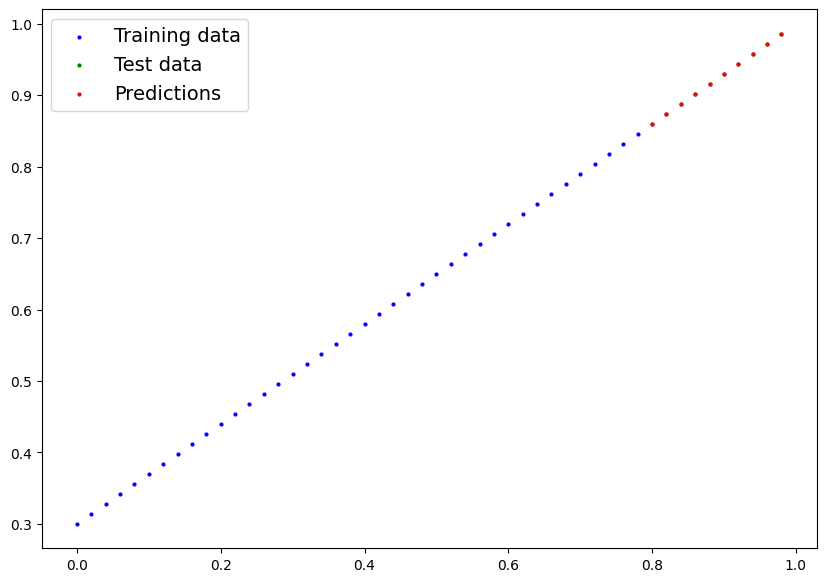

In [20]:
plot_predictions(predictions=y_preds_new)

## 5. Saving and loading a PyTorch model

If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| PyTorch method | What does it do? |
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Saves a serialized object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`.  |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Uses `pickle`'s unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. |

> **Note:** As stated in [Python's `pickle` documentation](https://docs.python.org/3/library/pickle.html), the `pickle` module **is not secure**. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.


In [21]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory (if needed)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save Model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [22]:
# Saving entire model
WHOLE_MODEL_NAME = "01_pytorch_workflow_whole_model_0.pth"
WHOLE_MODEL_SAVE_PATH = MODEL_PATH / WHOLE_MODEL_NAME

print(f"Saving whole model to: {WHOLE_MODEL_SAVE_PATH}")
torch.save(obj=model_0,
           f=WHOLE_MODEL_SAVE_PATH)

Saving whole model to: models/01_pytorch_workflow_whole_model_0.pth


In [23]:
## Loading model dictionary again
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(loaded_model_0.state_dict())

## Loading whole model
whole_loaded_model_0 = torch.load(f=WHOLE_MODEL_SAVE_PATH)
print(whole_loaded_model_0.state_dict())

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3001]))])
OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3001]))])


In [24]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
  whole_loaded_model_preds = whole_loaded_model_0(X_test)
  y_preds = model_0(X_test)

loaded_model_preds, whole_loaded_model_preds

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [25]:
# Compare loaded model preds with original model preds

y_preds == loaded_model_preds, y_preds == whole_loaded_model_preds

(tensor([[True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True]]),
 tensor([[True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True]]))

## 6. Putting it all together

We've covered a fair bit of ground so far.

But once you've had some practice, you'll be performing the above steps like dancing down the street.

Speaking of practice, let's put everything we've done so far together.

Except this time we'll make our code device agnostic (so if there's a GPU available, it'll use it and if not, it will default to the CPU).

There'll be far less commentary in this section than above since what we're going to go through has already been covered.

We'll start by importing the standard libraries we need.

> **Note:** If you're using Google Colab, to setup a GPU, go to Runtime -> Change runtime type -> Hardware acceleration -> GPU. If you do this, it will reset the Colab runtime and you will lose saved variables.

In [209]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

In [210]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [211]:
# Create weight and bias
weight = 0.17
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3034],
         [0.3068],
         [0.3102],
         [0.3136],
         [0.3170],
         [0.3204],
         [0.3238],
         [0.3272],
         [0.3306]]))

In [212]:
# Split the data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train.shape, y_train.shape

(torch.Size([40, 1]), torch.Size([40, 1]))

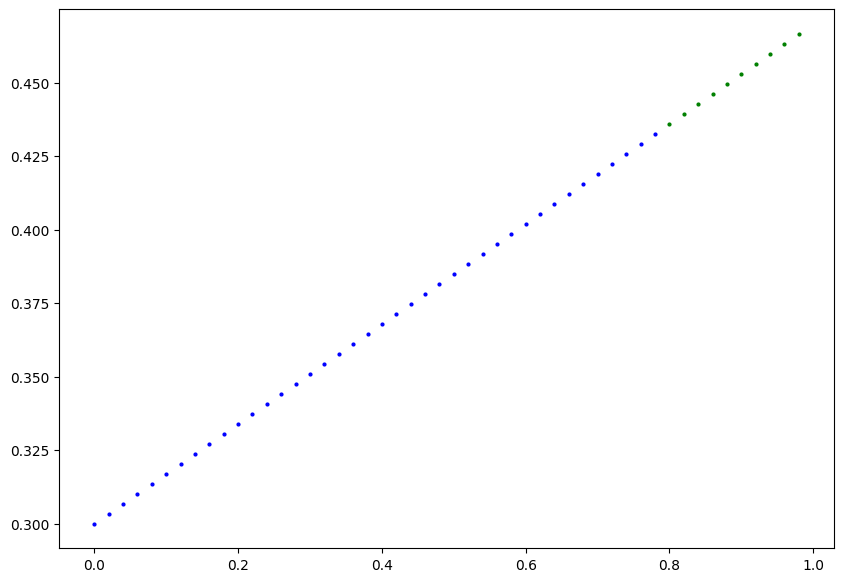

In [213]:
#Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [214]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating model parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [215]:
# Check the model device
next(model_1.parameters()).device

device(type='cpu')

In [216]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

Time to build a training and testing loop.

First we'll need a loss function and an optimizer.

Let's use the same functions we used earlier, `nn.L1Loss()` and `torch.optim.SGD()`.

We'll have to pass the new model's parameters (`model.parameters()`) to the optimizer for it to adjust them during training.

The learning rate of `0.01` worked well before too so let's use that again.




In [217]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
epsilon = 0.01
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = epsilon)
X_train.device

device(type='cpu')

In [218]:
# Training Loop
torch.manual_seed(42)


epochs = 501

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Backprop
  loss.backward()

  # 5. Gradient Descent
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 25 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  # Adjust the learning rate as we go on so as not to overshoot target
  if epoch % 250 == 0:
    factor = 10 ** (epoch/150)
    optimizer = torch.optim.SGD(params=model_1.parameters(),
                          lr = epsilon/factor)


Epoch: 0 | Loss: 0.7618779540061951 | Test Loss: 1.0456762313842773
Epoch: 25 | Loss: 0.473853200674057 | Test Loss: 0.7089016437530518
Epoch: 50 | Loss: 0.1858285665512085 | Test Loss: 0.37212705612182617
Epoch: 75 | Loss: 0.06405752152204514 | Test Loss: 0.16993513703346252
Epoch: 100 | Loss: 0.0531190000474453 | Test Loss: 0.12622876465320587
Epoch: 125 | Loss: 0.044474564492702484 | Test Loss: 0.10348687320947647
Epoch: 150 | Loss: 0.03588683530688286 | Test Loss: 0.08349256962537766
Epoch: 175 | Loss: 0.027302337810397148 | Test Loss: 0.06281137466430664
Epoch: 200 | Loss: 0.018718114122748375 | Test Loss: 0.04281696304678917
Epoch: 225 | Loss: 0.01013391837477684 | Test Loss: 0.02282259240746498
Epoch: 250 | Loss: 0.0015556737780570984 | Test Loss: 0.0021502734161913395
Epoch: 275 | Loss: 0.001027019345201552 | Test Loss: 0.002365970751270652
Epoch: 300 | Loss: 0.0008415683987550437 | Test Loss: 0.0019499212503433228
Epoch: 325 | Loss: 0.0006566494703292847 | Test Loss: 0.0015190

### 6.4 Making predictions

Now we've got a trained model, let's turn on it's evaluation mode and make some predictions.

In [219]:
model_1.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.1701]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.2999], device='cuda:0'))]),
 0.17,
 0.3)

In [220]:
with torch.inference_mode():
  y_preds_new = model_1(X_test)
y_preds_new, y_test

(tensor([[0.4359],
         [0.4393],
         [0.4427],
         [0.4461],
         [0.4495],
         [0.4529],
         [0.4563],
         [0.4597],
         [0.4631],
         [0.4665]], device='cuda:0'),
 tensor([[0.4360],
         [0.4394],
         [0.4428],
         [0.4462],
         [0.4496],
         [0.4530],
         [0.4564],
         [0.4598],
         [0.4632],
         [0.4666]], device='cuda:0'))

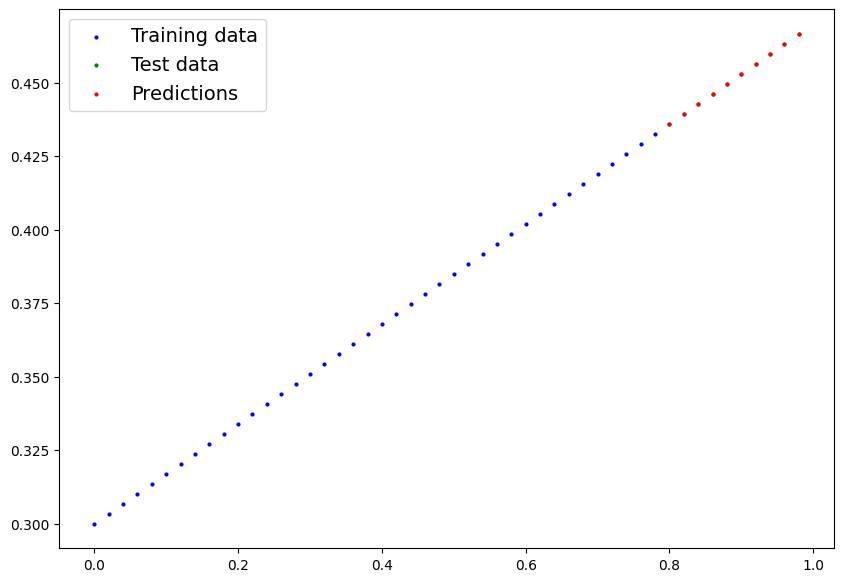

In [221]:
# Plot and port everything back to CPU to be able to plot
plot_predictions(X_train.cpu(),
                 y_train.cpu(),
                 X_test.cpu(),
                 y_test.cpu(),
                 y_preds_new.cpu())

### 6.5 Saving & Loading a trained model

In [228]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory (if needed)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save Model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

models
Saving model to: models/01_pytorch_workflow_model_1.pth


In [225]:
# Load PyTorch model
loaded_model_1 = LinearRegressionModelV2()

# Create a new instance of a linear regression model V2
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put model on target device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [226]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_1(X_test)
  y_preds = model_1(X_test)

In [227]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')